# "[NDIR] Near-Duplicate Image Detection System Using Coarse-to-Fine Matching Scheme Based on Global and Local CNN Features"
> 2020, Mathematics, Zhili Zhou, Kunde Lin, Yi Cao

- toc: false
- badges: false
- comments: false
- categories: [near-duplicate image detection, paper-review]
- hide_{github,colab,binder,deepnote}_badge: true

# 1. Abstract
- They proposed a __coarse-to-fine feature matching scheme__ using both _global_ and _local_ CNN features for real-time near-duplicate image detection.

# 2. Proposed Method Summary

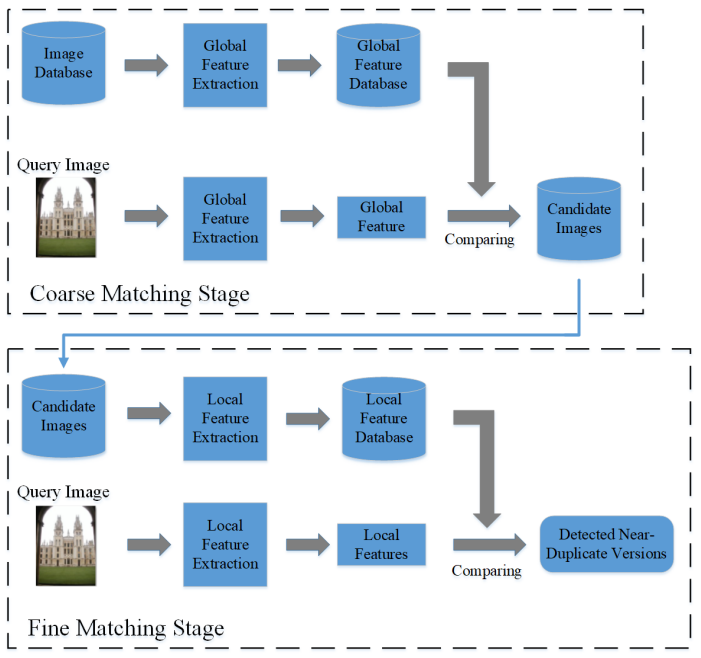

In [2]:
Image('fig1.png', width=500)

Figure 1 shows the framework of the proposed approach. <br>

__Summary)__<br>

1. Coarse matching stage
    1. __Generate CFMs__(convolutional feature maps) by feeding images into a pre-trained CNN model.
    2. __Extract global features__ from each image using sum-pooling.
    3. Match these features between images to obtain __the candidate images__ of a given query from an image database.

And there are some candidate images. For those,

2. Fine matching stage
    1. Generate local regions
        - Generate $N$ number of local regions by detecting maximum points of central cropped CFMs(total $N_P$, i.e., $N_P = 256$).
        - Generate by detecting local maximum points of central cropped 
    2. Match to further detect the near-duplicate versions of the query.

## 2.1. CFM Generation
The output of a convolutional layer is a set of feature maps, i.e., CFMs. In their approach, they feed each image to a pretrained CNN model, and use the output of the last convolutional layer for feature extraction. 

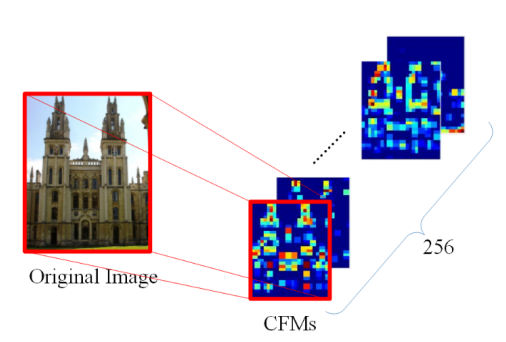

In [4]:
Image("fig2.png", width=400)

Figure 2 shows the 256 CFMs generated from the last convolutional layer(the fifth convolutional layer) after feeding an image into the pre-trained AlexNet model, where the sizes of CFMs are proportional to the size of the original image.

## 2.2. Coarse Matching Stage
They first match global features to implement a coarse feature matching to efficiently filter most irrelevant images of a given query.

### 2.2.1. The Extraction of Global CNN Feature
They adopt sum-pooling operation on the CFMs to extract the global features.

For a given Image $I_i$, they feed it into the pretrained AlexNet model and collect the output of the fifth convolutional layer to form a set of CFMs, denoted as $\text{MS}_i = \{ M_i^1, M_i^2, \cdots, M_i^k, \cdots , M_i^M\}$, where $1 \le k \le M$ and $M = 256$. For each CFM, i.e., $M_i^k$, its size and activations are denoted as $W \times H$ and  $F_i^k = \{ f_i^k(x, y) : 1 \le x \le W, 1 \le y \le H \}$, respectively. Subsequently, they use Equation (1) to extract global features by sum-pooling operation:

$$
\tag{1}
\phi(F_i^k) = \sum_{y = 1}^{H} \sum_{x = 1}^{W} f_i^k(x, y)
$$

After this, hey concatenate all of these feature values to obtain a 256-dimensional feature vector 

$$
\partial(I_i) = (\phi(F_i^1), \phi(F_2^k), \cdots, \phi(F_M^k))
$$

, and normalize the feature vector as 

$$
V(I_i) = \frac{\partial (I_i)}{||\partial (I_i)||_2}.
$$

### 2.2.2. Global Feature Matching
For a given query image $I_q$ and a database image $I_d$, there are $V(I_q)$ and $V(I_d)$. Then they employ Equation (2) to compute the inner product of the two feature vectors to measure the global similarity between the two images.

$$
\tag{2}
\text{SIM}(I_q, I_d) = \left< V(I_q), V(I_d) \right>
$$

After computing the similarity, they sort all similarity values in descending order $\{\text{SIM}_1, \text{SIM}_2, \cdots, \text{SIM}_{N_D}\}$, where $\text{SIM}_1 > \text{SIM}_2 > \cdots > \text{SIM}_{N_D}$ and $N_D$ means the number of database images. In their method, they only keep $N_\text{Top} = 1000$ detected images of the query as its candidate images, and remove the others.

## 2.3. Fine Matching Stage


### 2.3.1. Central Cropping


Denote the ratio between the area of each cropped CFM and that of each original CFM as $\alpha$. If the area of an original CFM is $S_\text{CFM} = W \times H$, the area of a corpped CFM is $S_\text{CFM}^\prime = \alpha \times S_\text{CFM}$, where $0 < \alpha < 1$.

To generate the cropped CFM, they set the coordinates of the central point of the cropped CFM by

$$
\tag{3}
\begin{cases}
x_c = \left\lfloor \frac{W}{2} \right\rfloor + 1 \\
y_c = \left\lfloor \frac{H}{2} \right\rfloor + 1 \\
\end{cases}
$$

Thus, the cropped CFM can be denoted as $R = [(x_c, y_c), W^\prime, H^\prime]$, which will be used for local region detection.

### 2.3.2. Local Region Detection

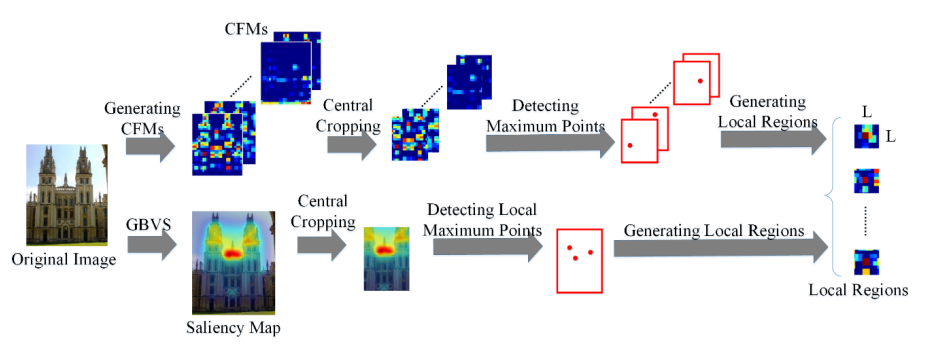

In [6]:
Image('fig3.png', width=500)

Above figure is the flowchart of local region generation. There are two main process.

1. CFM based $\rightarrow$ $N$ local regions
2. GBVS based $\rightarrow$ all of local regions

They detect the points with maximum activations, i.e., maximum points on the cropped CFMs, and the generate the regions surrounding these maximum points for local CNN feature extraction. For a CFM $M_i^k$, they select the maximum value among all the activations by

$$
\tag{4}
m_i^k = \max \left\{ f_i^k (x, y) : 1 \le x \le W, 1 \le y \le H \right\}
$$

Also, they generate the saliency map by the graph-based visual saliency detection(GBVS) algorithm. Then, they also apply central cropping on the saliency map, and detect the local maximum values of the saliency map. The patch surrounding the local maximum points are used as the local region, where the side length of the patch is denoted as $L$.<br><br> 

Suppose $N_P$ maximum points are generated from the CFMs in total. Thus, $N_p$ corresponding local regions are generated. <br><br>

- They will not use all the regions generated from CFMs for feature extraction. Instead, they sort these regions in descending order according to the activation values of the corresponding maximum points, and select the first $N$ regions for local feature extraction.
- However, they use all the regions generated from the saliency map for local feature extraction.

After these, $M$ local regions are extracted.

> I am not sure why the local regions made of the local maximum points of the saliency map are finite and the M value is a fixed representation.

### 2.3.3. Local Features Extraction and Matching
For $M$ local regions, they extract 256-dimensional feature vectors by sum-pooling the activations of CFMs, and then normalize it. Thus, for a given image $I_i$, they can extract a set of 256-simensional normalized local feature vectors $VS_{I_i} = \{ V_1(I_i), \cdots,  V_M(I_i) \}$. <br><br>

For a query image $I_q$ and a candiate image $I_c$, there are $VS_{I_q} = \{ V_1(I_q), \cdots,  V_M(I_q) \}$ and $VS_{I_c} = \{ V_1(I_c), \cdots,  V_M(I_c) \}$. <br>
By comparing a query feature vector $V_k(I_q)$ to each feature vector $V_j(I_c)$ in $VS_c$, where $i \le j \le M$, they can obtain $M$ similarity scores and then select the maximum score as the matching score of $V_k(I_q)$.

$$
\max \left\{ \left< V_k(I_q), V_j(I_c) \right> : j = 1,2, \cdots, M\right\}
$$

Thus, there are $M$ matching scores in total. And they sum up all the matching scores as the final similarity between the query image $I_q$ and the candidate image $I_c$ by Equation (6).

$$
\tag{6}
\text{SIM}(I_q, I_c) = \sum_{k = 1}^{M} \max \left\{ \left< V_k(I_q), V_j(I_c) \right> : j = 1,2, \cdots, M\right\}
$$

Finally, they compare the similarity score to a pre-set threshold to determine whether the candidate image $I_c$ is near-duplicate version of the query $I_q$.

# 3. Experiments

## 3.1. Datasets and Evaluation Criteria

Three near-duplicate image detection dataset
- Oxford5K dataset
- Holidays dataset
- Paris6K dataset

All of those seems like non-identical near duplicate image dataset.

Performance measure with mAP and average query time.

## 3.2. Parameter Determination
Parameters
- $\alpha$ : central cropping ratio
- $N$ : maximum number of regions
- $L$ : side length of regions

The parameter $\alpha$ can be easily set as 0.5 by following experiment that fix parameters $L$ and $N$ to the default values, 3 and 100.

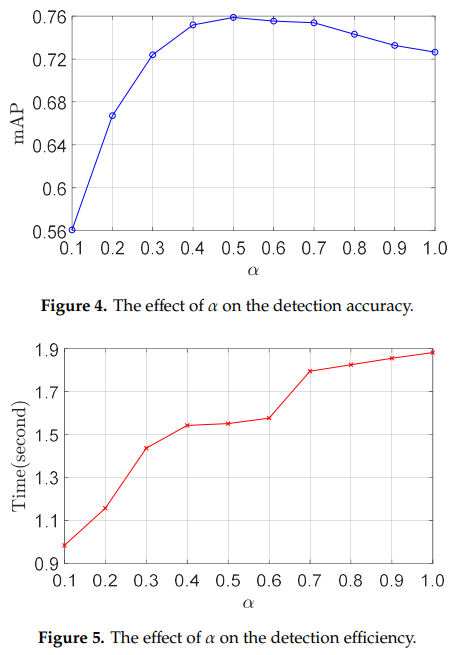

In [3]:
Image("fig4-5.png", width=400)

The parameter $N$ can be easily set as 100.

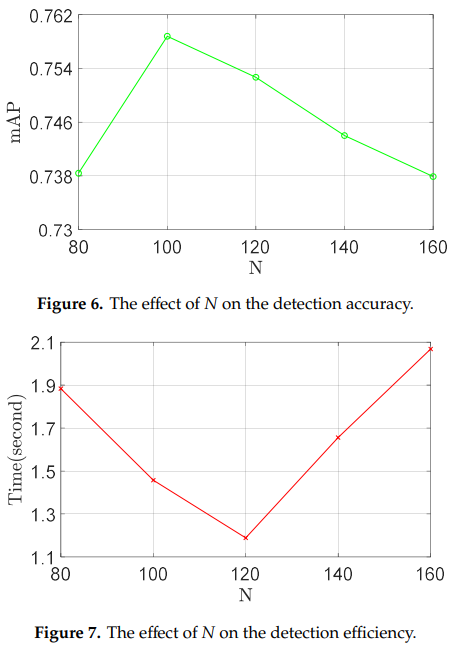

In [4]:
Image("fig6-7.png", width=400)

The parameter $L$ can be easily set as 5.

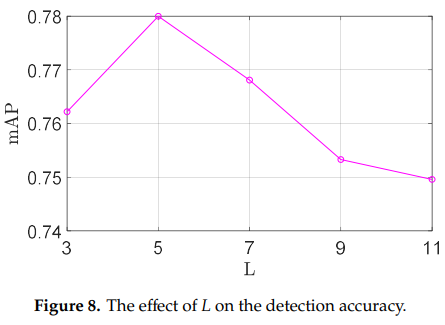

In [5]:
Image("fig8.png", width=400)

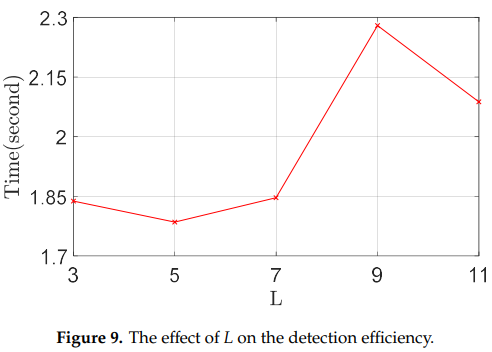

In [6]:
Image("fig9.png", width=400)

## 3.3. Performance When Using Different Pre-Trained Networks

They chose four famous convolutional neural networks including AlexNet, VGG16, VGG19, and ResNet-18, where the last convolutional layers or ReLu layers.

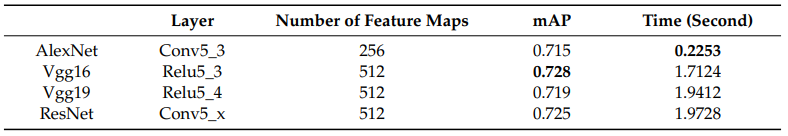

In [7]:
Image("table1.png")

To find a good trade-off between accuracy and efficiency, they chose AlexNet in their method.

## 3.4. Performance Comparison

After selecting the parameters, they use Oxford5K as the baseline dataset to compare the detection performances between their method and its two other versions in the aspects of detection accuracy, average time cost, and average memory consumption. The two versions are just using global CNN features or local CNN features.

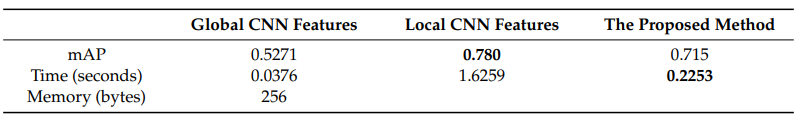

In [8]:
Image("table2.png")

Overall, the proposed method generally outperforms state-of-the-art methods.

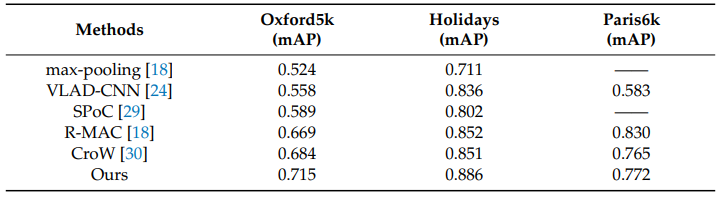

In [9]:
Image("table3.png")

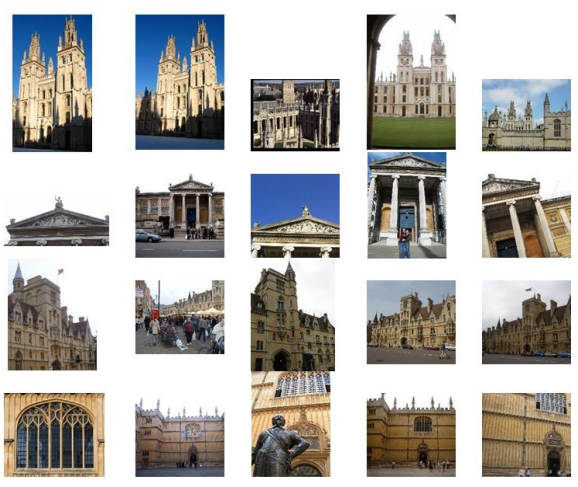

In [10]:
Image("fig10.png", width=500)

Above figure shows several examples of detection results of the proposed method. The four queries are listed in the first column, and the corresponding top four ranked detection results of each query are shown in the following columns.

# 4. Conclusions
- The pre-trained CNN models are originally designed for image classification. Thus, it might be more effective to adopt the transfer learning methods to generate a fine-tuned CNN model for near-duplicate image detection.
- The saliency mapo is generated by an unsupervised method to locate potential object regions for local feature extraction. IN future work, it can be useful to use the supervised object recognition methods to accurately locate the object regions for local feature extraction to further improve the detection performance.

# Commnets
- We may be handle local feature extraction module. As the author said, selecting local features using models used for object detection is better than using saliency maps.
- It is a simple but very good idea to use global features to remove irrelevant images first, and then to increase efficiency by removing local features.
- Actually, the task seems a little different from what I thought. The near-duplicate image refered by the author seems to be a non-identical near-duplicate image. Even in this case, it is questionable whether it can be used in applications such as copyright protection and redundancy elimination described in the introduction. This content should be dealt with in the identical near-duplication image retrieval, so I do not know if the data set selection is correct.